In [1]:
import pandas as pd
import json
from datetime import date

In [2]:
file_json_full = 'ftp://atviriduomenys.nvsc.lt/COVID19.json'
json_data_full = pd.read_json(file_json_full)

In [3]:
json_data_full['Susirgimo data'] = pd.to_datetime(json_data_full['Susirgimo data']) #"Start of sickness" 
json_data_full['Atvejo patvirtinimo data'] = pd.to_datetime(json_data_full['Atvejo patvirtinimo data']) #"Positive test date"

In [4]:
display(json_data_full.head(2))
display(json_data_full.info())

,Susirgimo data,Atvejo patvirtinimo data,Įvežtinis,Šalis,Išeitis,Užsienietis,Atvejo amžius,Lytis,Savivaldybė,Ar hospitalizuotas,Gydomas intensyvioje terapijoje,Turi lėtinių ligų
0,2020-03-04,2020-03-16,Taip,Pietų Afrikos Respublika,Mirė,Ne,60-69,Vyras,Panevėžio r.,Taip,Taip,Taip
1,2020-03-13,2020-03-22,Taip,Austrijos Respublika,Pasveiko,Ne,40-49,Vyras,Švenčionių r.,Taip,,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114527 entries, 0 to 114526
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Susirgimo data                   107961 non-null  datetime64[ns]
 1   Atvejo patvirtinimo data         114527 non-null  datetime64[ns]
 2   Įvežtinis                        114527 non-null  object        
 3   Šalis                            114527 non-null  object        
 4   Išeitis                          114527 non-null  object        
 5   Užsienietis                      114527 non-null  object        
 6   Atvejo amžius                    114527 non-null  object        
 7   Lytis                            114527 non-null  object        
 8   Savivaldybė                      114527 non-null  object        
 9   Ar hospitalizuotas               114527 non-null  object        
 10  Gydomas intensyvioje terapijoje  114527 non-

None

In [5]:
"""
display(json_data_full['Įvežtinis'].value_counts())
display(json_data_full['Šalis'].value_counts())
display(json_data_full['Išeitis'].value_counts())
display(json_data_full['Užsienietis'].value_counts())
display(json_data_full['Atvejo amžius'].value_counts())
display(json_data_full['Lytis'].value_counts())
display(json_data_full['Savivaldybė'].value_counts())
display(json_data_full['Ar hospitalizuotas'].value_counts())
display(json_data_full['Gydomas intensyvioje terapijoje'].value_counts())
display(json_data_full['Turi lėtinių ligų'].value_counts())
"""

"\ndisplay(json_data_full['Įvežtinis'].value_counts())\ndisplay(json_data_full['Šalis'].value_counts())\ndisplay(json_data_full['Išeitis'].value_counts())\ndisplay(json_data_full['Užsienietis'].value_counts())\ndisplay(json_data_full['Atvejo amžius'].value_counts())\ndisplay(json_data_full['Lytis'].value_counts())\ndisplay(json_data_full['Savivaldybė'].value_counts())\ndisplay(json_data_full['Ar hospitalizuotas'].value_counts())\ndisplay(json_data_full['Gydomas intensyvioje terapijoje'].value_counts())\ndisplay(json_data_full['Turi lėtinių ligų'].value_counts())\n"

In [6]:
#gender
json_data_full['Lytis'].replace('mot.','Moteris', inplace  = True)
json_data_full['Lytis'].replace('','nėra duomenų', inplace  = True)
display(json_data_full['Lytis'].value_counts())

Moteris         65029
Vyras           49083
nėra duomenų      415
Name: Lytis, dtype: int64

In [7]:
json_data_full['Išeitis'].replace('','nėra duomenų', inplace  = True)
json_data_full['Išeitis'].replace('Kita','nėra duomenų', inplace  = True)
display(json_data_full['Išeitis'].value_counts())

Gydomas         61914
Pasveiko        51002
Mirė             1049
nėra duomenų      540
Nesirgo            22
Name: Išeitis, dtype: int64

In [8]:
json_data_full['Atvejo amžius'].replace('','nėra duomenų', inplace  = True)
display(json_data_full['Atvejo amžius'].value_counts())

50-59           24096
40-49           20400
30-39           19246
20-29           15344
60-69           15032
70-79            5987
10-19            5364
80-89            4373
0-9              3280
90-99            1073
nėra duomenų      319
100-109            12
120-129             1
Name: Atvejo amžius, dtype: int64

In [9]:
json_data_full['Gydomas intensyvioje terapijoje'].replace('','Ne', inplace  = True)
json_data_full['Turi lėtinių ligų'].replace('','Ne', inplace  = True)
display(json_data_full['Gydomas intensyvioje terapijoje'].value_counts())
display(json_data_full['Turi lėtinių ligų'].value_counts())

Ne      114313
Taip       214
Name: Gydomas intensyvioje terapijoje, dtype: int64

Ne      102044
Taip     12483
Name: Turi lėtinių ligų, dtype: int64

In [10]:
display(json_data_full.head(2))
json_data_full = json_data_full[json_data_full['Išeitis'] != 'Nesirgo']

,Susirgimo data,Atvejo patvirtinimo data,Įvežtinis,Šalis,Išeitis,Užsienietis,Atvejo amžius,Lytis,Savivaldybė,Ar hospitalizuotas,Gydomas intensyvioje terapijoje,Turi lėtinių ligų
0,2020-03-04,2020-03-16,Taip,Pietų Afrikos Respublika,Mirė,Ne,60-69,Vyras,Panevėžio r.,Taip,Taip,Taip
1,2020-03-13,2020-03-22,Taip,Austrijos Respublika,Pasveiko,Ne,40-49,Vyras,Švenčionių r.,Taip,Ne,Ne


In [11]:
covid_grouped = json_data_full.groupby(['Atvejo patvirtinimo data', 'Išeitis']).agg({'Išeitis':'count'}).rename(columns={'Išeitis':'Total_Number'}).reset_index()
covid_table = covid_grouped.pivot_table(index=['Atvejo patvirtinimo data'], 
                    columns='Išeitis', 
                    values='Total_Number',
                    fill_value=0).reset_index(drop=False)


covid_table = covid_table[['Atvejo patvirtinimo data','Gydomas', 'Pasveiko','Mirė', 'nėra duomenų']]
covid_table['Total per day'] = covid_table['Gydomas']+covid_table['Pasveiko']+covid_table['Mirė']+covid_table['nėra duomenų']
covid_table['Running: currently sick'] = covid_table['Gydomas'].cumsum(skipna = True)
covid_table['Running: recovered'] = covid_table['Pasveiko'].cumsum(skipna = True)
covid_table['Running: died'] = covid_table['Mirė'].cumsum(skipna = True)
covid_table['Running: unknown'] = covid_table['nėra duomenų'].cumsum(skipna = True)
covid_table['Running: Total'] = covid_table['Running: currently sick']+covid_table['Running: recovered']+covid_table['Running: died']+covid_table['Running: unknown']
covid_table['Running: Completed'] = covid_table['Running: recovered']+covid_table['Running: died']


display(covid_table.tail(10))


Išeitis,Atvejo patvirtinimo data,Gydomas,Pasveiko,Mirė,nėra duomenų,Total per day,Running: currently sick,Running: recovered,Running: died,Running: unknown,Running: Total,Running: Completed
276,2020-12-11,2804,474,16,8,3302,38243,50551,975,508,90277,51526
277,2020-12-12,2584,232,14,10,2840,40827,50783,989,518,93117,51772
278,2020-12-13,1804,108,5,2,1919,42631,50891,994,520,95036,51885
279,2020-12-14,1383,33,15,4,1435,44014,50924,1009,524,96471,51933
280,2020-12-15,3351,49,12,8,3420,47365,50973,1021,532,99891,51994
281,2020-12-16,3130,18,9,3,3160,50495,50991,1030,535,103051,52021
282,2020-12-17,3163,10,7,3,3183,53658,51001,1037,538,106234,52038
283,2020-12-18,3215,1,7,1,3224,56873,51002,1044,539,109458,52046
284,2020-12-19,2915,0,2,0,2917,59788,51002,1046,539,112375,52048
285,2020-12-20,2126,0,3,1,2130,61914,51002,1049,540,114505,52051


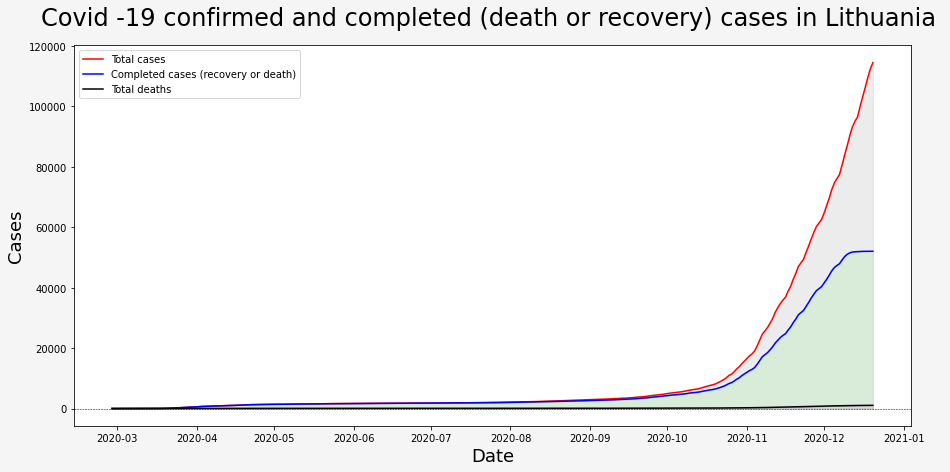

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")

ax.plot(covid_table['Atvejo patvirtinimo data'], covid_table['Running: Total'] , color = "red", label='Total cases')
ax.plot(covid_table['Atvejo patvirtinimo data'], covid_table['Running: Completed'], color = "blue", label = "Completed cases (recovery or death)")
ax.plot(covid_table['Atvejo patvirtinimo data'], covid_table['Running: died'], color = "Black", label='Total deaths')

ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Cases',fontsize=18)
ax.set_title("Covid -19 confirmed and completed (death or recovery) cases in Lithuania " , fontsize=24, pad=20)

X = np.array(covid_table['Atvejo patvirtinimo data'])

Y1 = np.array(covid_table['Running: Total'])
Y2 = np.array(covid_table['Running: Completed'])
Y3 = np.array(covid_table['Running: died'])
ax.fill_between(X, Y1,Y2,color='grey',alpha=.15)
ax.fill_between(X, Y2,Y3,color='green',alpha=.15)
ax.fill_between(X, Y3,0,color='black',alpha=.15)

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax.legend()
plt.show()

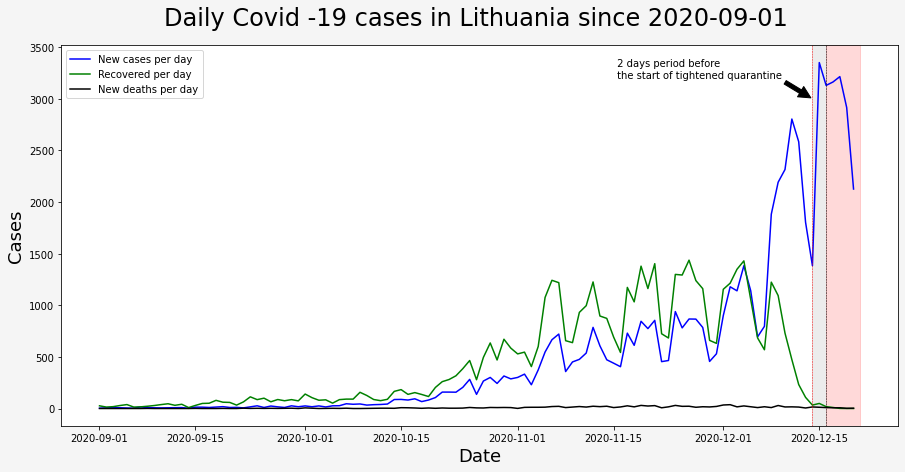

In [13]:
import matplotlib.pyplot as plt
import numpy as np

covid_table09 = covid_table[covid_table['Atvejo patvirtinimo data']>='2020-09-01']
fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")

ax.plot(covid_table09['Atvejo patvirtinimo data'], covid_table09["Gydomas"] , color = "blue", label='New cases per day')
ax.plot(covid_table09['Atvejo patvirtinimo data'], covid_table09['Pasveiko'], color = "green", label = "Recovered per day")
ax.plot(covid_table09['Atvejo patvirtinimo data'], covid_table09['Mirė'], color = "black", label='New deaths per day')

ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Cases',fontsize=18)
ax.set_title("Daily Covid -19 cases in Lithuania since 2020-09-01 " , fontsize=24, pad=20)


plt.axvline(x = date(2020,12,14), color='red', linestyle='--', linewidth=0.5) #start of tightened quarantine
plt.axvline(x = date(2020,12,16), color='black', linestyle='--', linewidth=0.5) #start of tightened quarantine

ax.axvspan(date(2020,12,14), date(2020,12,16), alpha=0.15, color='grey')
ax.axvspan(date(2020,12,16), date(2020,12,21), alpha=0.15, color='red')
ax.legend()

plt.annotate(' 2 days period before \n the start of tightened quarantine'
             ,xy = (date(2020,12,14),3000)
             ,xytext = (date(2020,11,15),3200),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [14]:
mobility_csv_file = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
c_size = 5000

mobility_dataLT = None
for chunk in pd.read_csv(mobility_csv_file,chunksize=c_size, parse_dates=['date']):
    chunk_result =  chunk[chunk['country_region']=="Lithuania"]
    
    if mobility_dataLT is None:
        mobility_dataLT = chunk_result
    else:
        mobility_dataLT = mobility_dataLT.append(chunk_result)

print(mobility_dataLT.shape)


(17888, 14)


In [15]:
mobility_data_melted = pd.melt(mobility_dataLT, id_vars = ['country_region', 'sub_region_1', 'date'], 
                              value_vars = ['retail_and_recreation_percent_change_from_baseline',
                                            'grocery_and_pharmacy_percent_change_from_baseline',
                                            'parks_percent_change_from_baseline',
                                            'transit_stations_percent_change_from_baseline',
                                            'workplaces_percent_change_from_baseline',
                                            'residential_percent_change_from_baseline'])
display(mobility_data_melted.tail())


,country_region,sub_region_1,date,variable,value
107323,Lithuania,Vilnius County,2020-12-11,residential_percent_change_from_baseline,14.0
107324,Lithuania,Vilnius County,2020-12-12,residential_percent_change_from_baseline,6.0
107325,Lithuania,Vilnius County,2020-12-13,residential_percent_change_from_baseline,3.0
107326,Lithuania,Vilnius County,2020-12-14,residential_percent_change_from_baseline,12.0
107327,Lithuania,Vilnius County,2020-12-15,residential_percent_change_from_baseline,11.0


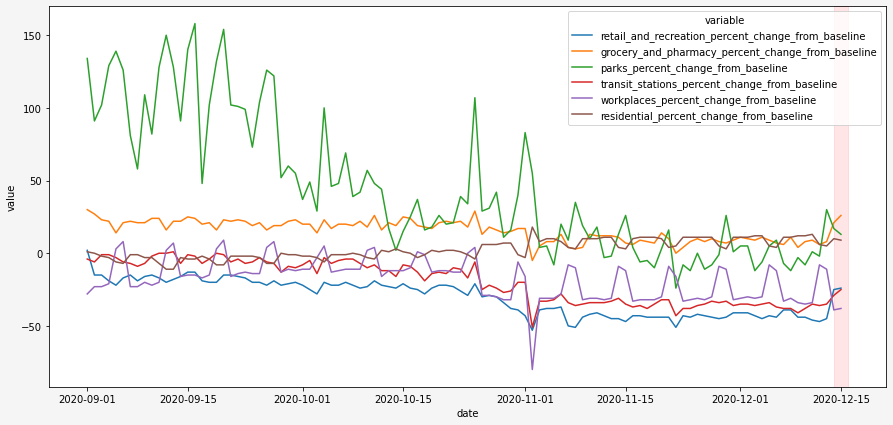

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")

#Selected aggregated data of Lithuania
mobility_data_melted = mobility_data_melted[mobility_data_melted['sub_region_1'].isna()] 
#Selected aggregated data of Lithuania from '2020-09-01'
mobility_data_melted09 = mobility_data_melted[mobility_data_melted['date']>='2020-09-01']

sns.lineplot(x= 'date',y ='value', data = mobility_data_melted09, hue = 'variable' )
ax.axvspan(date(2020,12,14), date(2020,12,16), alpha=0.1, color='red')

In [17]:
json_data_full.columns

Index(['Susirgimo data', 'Atvejo patvirtinimo data', 'Įvežtinis', 'Šalis',
       'Išeitis', 'Užsienietis', 'Atvejo amžius', 'Lytis', 'Savivaldybė',
       'Ar hospitalizuotas', 'Gydomas intensyvioje terapijoje',
       'Turi lėtinių ligų'],
      dtype='object')

Text(0, 0.5, '# of cases')

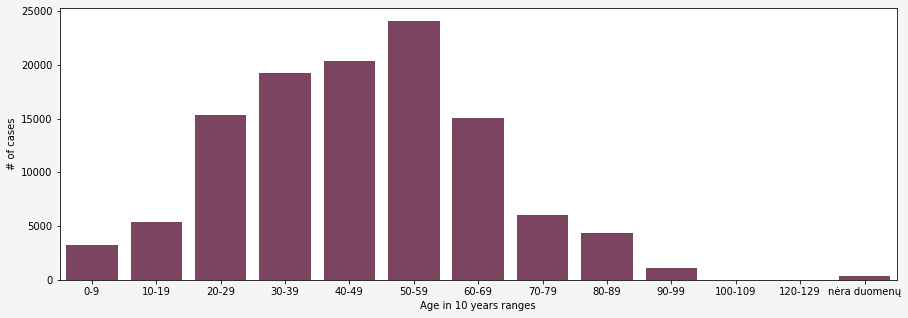

In [31]:
fig, ax = plt.subplots(figsize=(15,5),facecolor = "#F5F5F5")

order =  ['0-9','10-19','20-29','30-39','40-49','50-59', '60-69', '70-79', '80-89', '90-99', '100-109',  '120-129','nėra duomenų']
ax = sns.countplot(x='Atvejo amžius', data=json_data_full, order = order, color = "#843b62")
plt.xlabel('Age in 10 years ranges')
plt.ylabel('# of cases')

In [18]:
age_range = json_data_full['Atvejo amžius']
age_range.unique()
age_range_list = ['60-69', '40-49', '30-39', '50-59', '20-29', '10-19', '0-9',
       '70-79', '80-89', '90-99', '100-109', 'nėra duomenų', '120-129']
age_median = [64.5,44.5,34.5,54.5,24.5,14.5,4.5,74.5,84.5,94.5,104.5, np.NaN, 124.5]
new = zip(age_range_list,age_median)
new_values = pd.DataFrame(list(new))
new_values.columns = ["Atvejo amžius","age_median"]

json_data_full = pd.merge(json_data_full,new_values, on = "Atvejo amžius", how = "left"  )
json_data_full.tail()    

,Susirgimo data,Atvejo patvirtinimo data,Įvežtinis,Šalis,Išeitis,Užsienietis,Atvejo amžius,Lytis,Savivaldybė,Ar hospitalizuotas,Gydomas intensyvioje terapijoje,Turi lėtinių ligų,age_median
114500,2020-12-12,2020-12-16,Ne,,Gydomas,Ne,30-39,Moteris,Panevėžio m.,Ne,Ne,Ne,34.5
114501,2020-12-19,2020-12-20,Ne,,Gydomas,Ne,60-69,Moteris,Vilniaus m.,Ne,Ne,Ne,64.5
114502,2020-12-18,2020-12-18,Ne,,Gydomas,Ne,40-49,Moteris,Alytaus r.,Ne,Ne,Ne,44.5
114503,2020-12-12,2020-12-20,Ne,,Gydomas,Ne,50-59,Vyras,Lazdijų r.,Taip,Ne,Ne,54.5
114504,2020-12-17,2020-12-19,Ne,,Gydomas,Ne,20-29,Vyras,Rokiškio r.,Ne,Ne,Ne,24.5


-6.362818482962748

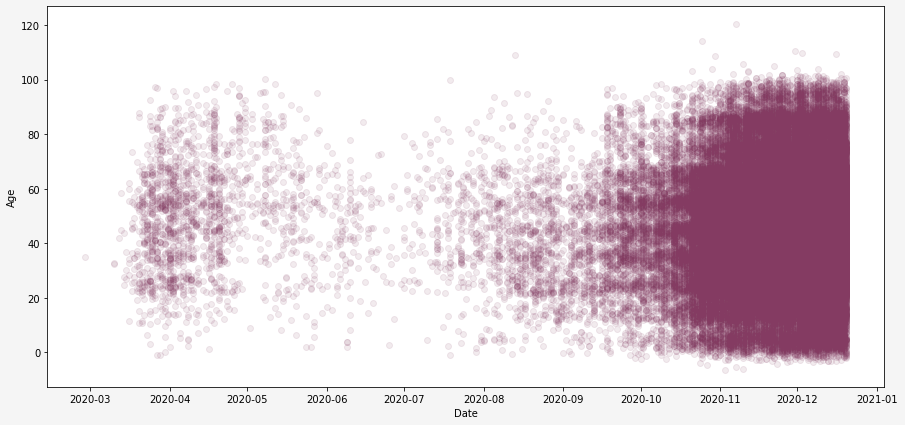

In [49]:
fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")
age_median = json_data_full["age_median"]
date = json_data_full['Atvejo patvirtinimo data']

age_jitter = age_median+np.random.normal(0, 3, size=len(age_median))
display(age_jitter.min())
# Make a scatter plot
plt.plot(date , age_jitter, 'o', alpha = 0.1, color = "#843b62")

plt.ylabel('Age')
plt.xlabel('Date')

plt.show()

,age_median,Gender,district_cat,outcome_cat,hosp_cat,reanim_cat,other_illness_cat
count,114186.000000,114016.000000,114186.000000,114186.000000,114186.000000,114186.000000,114186.000000
mean,45.894479,0.430071,33.060997,0.913615,0.061102,0.001874,0.109322
std,19.052582,0.495088,16.902657,0.998523,0.239518,0.043251,0.312044
min,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.500000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000
50%,44.500000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000
75%,54.500000,1.000000,49.000000,2.000000,0.000000,0.000000,0.000000
max,124.500000,1.000000,60.000000,3.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='age_median'>

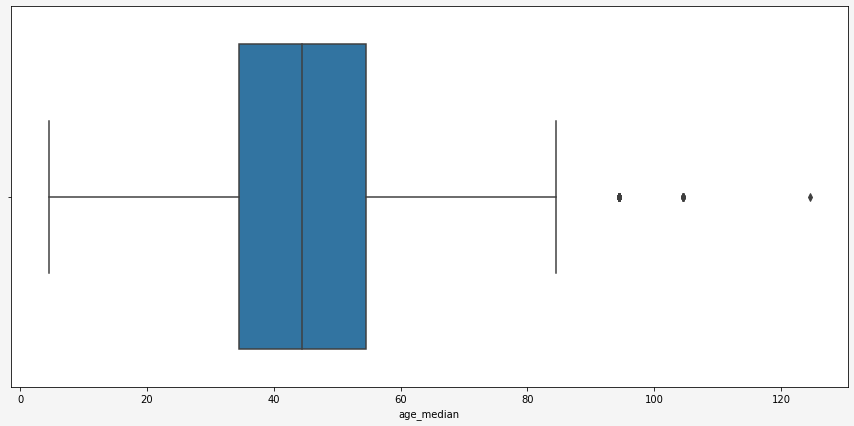

In [51]:
age_median = json_data_full.dropna(subset = ["age_median"])

display(age_median.describe())

fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")

sns.boxplot(x=json_data_full["age_median"])


In [53]:
Q1 = age_median["age_median"].quantile(0.25)
Q3 = age_median["age_median"].quantile(0.75)
IQR = Q3 - Q1
#print(IQR_tests)
Check_outliers = (age_median["age_median"] < (Q1 - 1.5 * IQR)) |(age_median["age_median"] > (Q3 + 1.5 * IQR))
Outliers_agerange = age_median[Check_outliers]['age_median'].unique()
Outliers_agerange_list = list(Outliers_agerange)
display(Outliers_agerange_list)
age_median_without_outliear = age_median[~age_median["age_median"].isin(Outliers_agerange_list)]

[94.5, 104.5, 124.5]

In [55]:
def decorate_cdf(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Age')
    plt.ylabel('CDF')
    plt.title(title)

count    113100.000000
mean         45.426437
std          18.531993
min           4.500000
25%          34.500000
50%          44.500000
75%          54.500000
max          84.500000
Name: age_median, dtype: float64

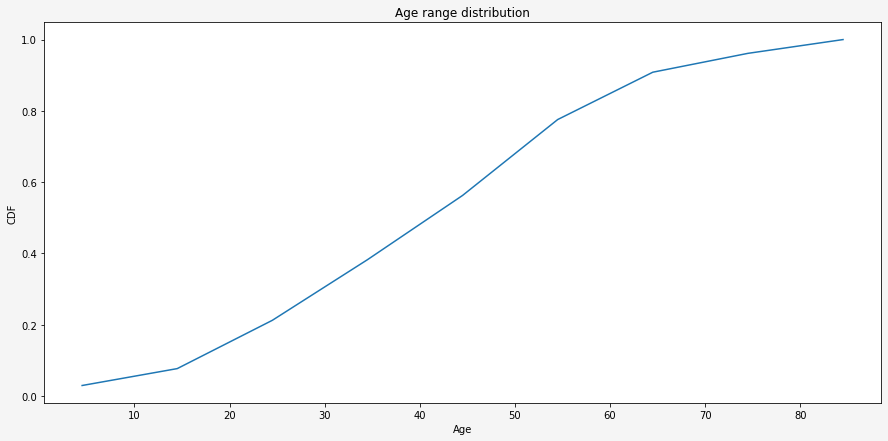

In [56]:
from empiricaldist import Pmf
from empiricaldist import Cdf

age_median_col = age_median_without_outliear["age_median"]

display(age_median_col.describe())

ageCdf = Cdf.from_seq(age_median_col, normalize=True)

fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")
ageCdf.plot()
decorate_cdf('Age range distribution')


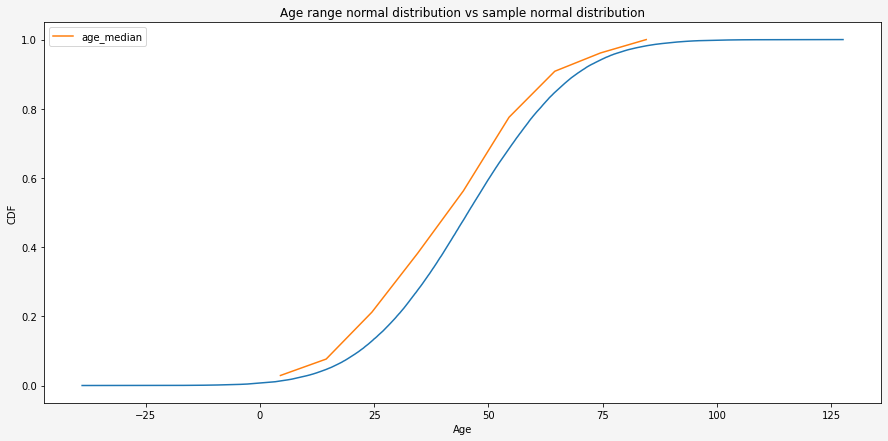

In [68]:
fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")
mean =  age_median_col.mean()  
std =   age_median_col.std() 
cdf1 = Cdf.from_seq(np.random.normal( mean,std,size=len(age_median_col)))
cdf1.plot()

ageCdf = Cdf.from_seq(age_median_col, normalize=True)
ageCdf.plot()

plt.legend()
decorate_cdf('Age range normal distribution vs sample normal distribution')

In [25]:
Gender ={'Vyras': 1, 'Moteris' : 0}
json_data_full['Gender']= json_data_full['Lytis'].map(Gender)

json_data_full["Savivaldybė"] = json_data_full["Savivaldybė"].astype('category')
json_data_full["district_cat"] = json_data_full["Savivaldybė"].cat.codes

json_data_full["Išeitis"] = json_data_full["Išeitis"].astype('category')
json_data_full["outcome_cat"] = json_data_full["Išeitis"].cat.codes

json_data_full["Ar hospitalizuotas"] = json_data_full["Ar hospitalizuotas"].astype('category')
json_data_full["hosp_cat"] = json_data_full["Ar hospitalizuotas"].cat.codes

json_data_full["Gydomas intensyvioje terapijoje"] = json_data_full["Gydomas intensyvioje terapijoje"].astype('category')
json_data_full["reanim_cat"] = json_data_full["Gydomas intensyvioje terapijoje"].cat.codes

json_data_full["Turi lėtinių ligų"] = json_data_full["Turi lėtinių ligų"].astype('category')
json_data_full["other_illness_cat"] = json_data_full["Turi lėtinių ligų"].cat.codes

json_data_full.head()

,Susirgimo data,Atvejo patvirtinimo data,Įvežtinis,Šalis,Išeitis,Užsienietis,Atvejo amžius,Lytis,Savivaldybė,Ar hospitalizuotas,Gydomas intensyvioje terapijoje,Turi lėtinių ligų,age_median,Gender,district_cat,outcome_cat,hosp_cat,reanim_cat,other_illness_cat
0,2020-03-04,2020-03-16,Taip,Pietų Afrikos Respublika,Mirė,Ne,60-69,Vyras,Panevėžio r.,Taip,Taip,Taip,64.5,1.0,33,1,1,1,1
1,2020-03-13,2020-03-22,Taip,Austrijos Respublika,Pasveiko,Ne,40-49,Vyras,Švenčionių r.,Taip,Ne,Ne,44.5,1.0,60,2,1,0,0
2,2020-03-16,2020-03-22,Ne,,Pasveiko,Ne,60-69,Vyras,Vilniaus m.,Taip,Ne,Ne,64.5,1.0,49,2,1,0,0
3,2020-03-16,2020-03-19,Taip,Šveicarijos Konfederacija,Pasveiko,Ne,30-39,Vyras,Vilniaus r.,Taip,Ne,Ne,34.5,1.0,50,2,1,0,0
4,2020-03-11,2020-03-21,Ne,,Pasveiko,Ne,50-59,Moteris,Vilniaus m.,Taip,Ne,Ne,54.5,0.0,49,2,1,0,0


In [26]:
json_data_full.corr()

,age_median,Gender,district_cat,outcome_cat,hosp_cat,reanim_cat,other_illness_cat
age_median,1.000000,-0.092831,-0.026117,-0.067147,0.301915,0.054962,0.262313
Gender,-0.092831,1.000000,0.005447,-0.007259,0.014764,0.008985,-0.020237
district_cat,-0.026117,0.005447,1.000000,0.053846,-0.007710,0.001712,-0.047056
outcome_cat,-0.067147,-0.007259,0.053846,1.000000,-0.021741,0.000683,-0.019278
hosp_cat,0.301915,0.014764,-0.007710,-0.021741,1.000000,0.159718,0.198580
reanim_cat,0.054962,0.008985,0.001712,0.000683,0.159718,1.000000,0.078939
other_illness_cat,0.262313,-0.020237,-0.047056,-0.019278,0.198580,0.078939,1.000000


LinregressResult(slope=0.0037955015318413524, intercept=-0.11309050449376745, rvalue=0.3019145145378388, pvalue=0.0, stderr=3.5467296940481085e-05)

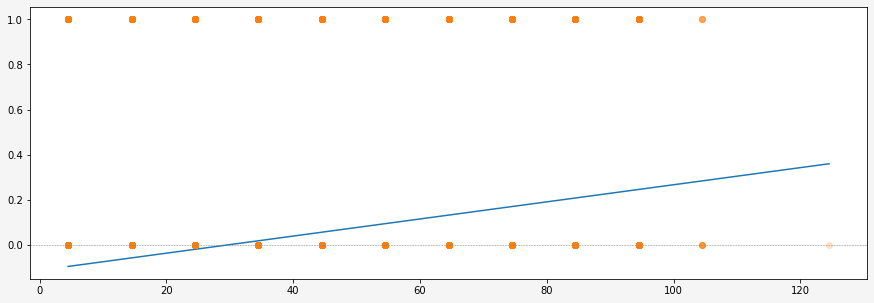

In [89]:

from scipy.stats import linregress
fig, ax = plt.subplots(figsize=(15,5),facecolor = "#F5F5F5")
subset = json_data_full.dropna(subset=['age_median', 'hosp_cat'])
xs = subset['age_median']
ys = subset['hosp_cat']

# Compute the linear regression
res = linregress(xs,ys)
display(res)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

plt.plot(xs, ys, 'o',  alpha=0.2)

plt.axhline(y=0, color='grey', linestyle='--', linewidth=0.5)

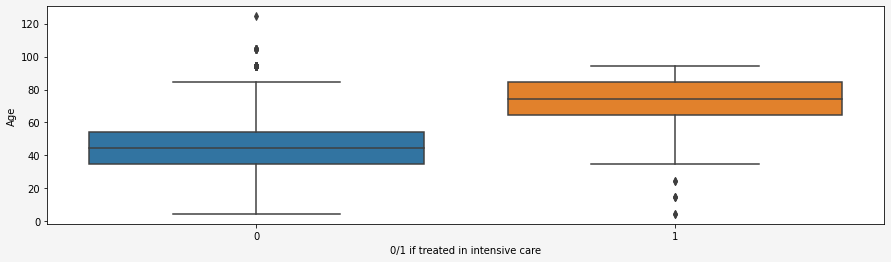

In [105]:
fig, ax = plt.subplots(figsize=(15,4),facecolor = "#F5F5F5")
y = json_data_full["age_median"]
x = json_data_full['reanim_cat']

sns.boxplot(x=x, y = y)
plt.ylabel('Age')
plt.xlabel('0/1 if treated in intensive care')

plt.show()

In [101]:
json_data_full[['Ar hospitalizuotas', 'Gydomas intensyvioje terapijoje']].drop_duplicates()

,Ar hospitalizuotas,Gydomas intensyvioje terapijoje
0,Taip,Taip
1,Taip,Ne
7,Ne,Ne
5217,Ne,Taip


In [102]:
test = json_data_full[['Ar hospitalizuotas', 'Gydomas intensyvioje terapijoje']]
test1 = test['Ar hospitalizuotas']=='Ne'
test2 = test['Gydomas intensyvioje terapijoje']=='Taip'
test[test1 & test2]

,Ar hospitalizuotas,Gydomas intensyvioje terapijoje
5217,Ne,Taip
10094,Ne,Taip
16633,Ne,Taip
21961,Ne,Taip
24434,Ne,Taip
26565,Ne,Taip
27705,Ne,Taip
30335,Ne,Taip
54034,Ne,Taip
69616,Ne,Taip


In [120]:
import statsmodels.formula.api as smf

results = smf.logit('reanim_cat ~ age_median + C(Gender)', data = json_data_full).fit()
print(results.params)

Optimization terminated successfully.
         Current function value: 0.012002
         Iterations 12
Intercept          -10.922833
C(Gender)[T.1.0]     0.718483
age_median           0.073503
dtype: float64
